# TME 1 Partie Apprentissage par Renforcement: Bandits

In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
header = ["id"] + ["repr" + str(i) for i in range(1,6)]+["clics"+str(i) for i in range(1,11)]
data=pd.read_csv("data/CTR.txt",sep=':|;',header=None, names = header)
data

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,id,repr1,repr2,repr3,repr4,repr5,clics1,clics2,clics3,clics4,clics5,clics6,clics7,clics8,clics9,clics10
0,0,0.748371,0.835208,0.076699,0.172439,0.143446,0.103419,0.190698,0.000000,0.102401,0.036312,0.074562,0.234702,0.000000,0.000000,0.078574
1,1,0.168419,0.133754,0.434864,0.995678,0.048800,0.000000,0.000000,0.000000,0.020827,0.000000,0.000000,0.022586,0.000000,0.146548,0.324596
2,2,0.485287,0.566989,0.041657,0.962560,0.185080,0.109575,0.136626,0.000000,0.098411,0.074771,0.000000,0.000000,0.000000,0.014760,0.193677
3,3,0.622231,0.196123,0.131147,0.439719,0.298934,0.000000,0.151069,0.000000,0.127239,0.112239,0.000000,0.012022,0.034284,0.000000,0.086177
4,4,0.331710,0.086411,0.023036,0.925518,0.333580,0.000000,0.109214,0.000000,0.151938,0.049861,0.000000,0.000000,0.037427,0.118916,0.216592
5,5,0.109601,0.879662,0.353879,0.669680,0.376216,0.089459,0.209107,0.000000,0.120088,0.000000,0.000000,0.078749,0.000000,0.000000,0.241406
6,6,0.127865,0.602231,0.986143,0.267415,0.488381,0.000000,0.045596,0.000000,0.441938,0.064135,0.000000,0.185478,0.142613,0.000000,0.245626
7,7,0.229038,0.506290,0.091916,0.781189,0.617084,0.104684,0.081973,0.000000,0.127450,0.085391,0.000000,0.000000,0.000000,0.000000,0.184564
8,8,0.421367,0.416732,0.965223,0.508880,0.212582,0.021246,0.000000,0.000000,0.245925,0.007313,0.000000,0.097657,0.092145,0.000000,0.318084
9,9,0.444963,0.583060,0.346337,0.370545,0.733722,0.000000,0.165378,0.000000,0.214613,0.014049,0.000000,0.055444,0.000000,0.000000,0.201386


In [3]:
annonceur=data[["clics"+str(i) for i in range(1,11)]].columns

## Stratégie Random: on choisit n'importe quel annonceur pour chaque texte.

In [4]:
data['strat_random']=data.apply(lambda x : random.choice(["clics"+str(i) for i in range(1,11)]),axis=1)

## Stratégie StaticBest : on choisit l'annonceur avec le meilleur taux de clics cumulés.

In [5]:
data['strat_StaticBest']=data.apply(lambda x : data[["clics"+str(i) for i in range(1,11)]].sum(0).argmax(),axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


## Stratégie Optimale : on choisit l'annonceur qui a le meilleur taux de clics à cette itération.

In [6]:
data['strat_optimal']=data[["clics"+str(i) for i in range(1,11)]].idxmax(axis=1)

## Visualisation 

<Figure size 432x288 with 0 Axes>

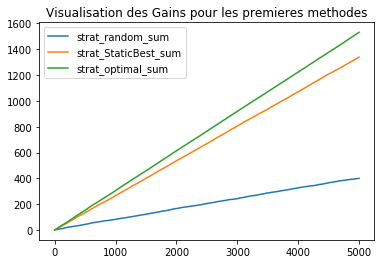

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
data['strat_random_sum']=data.apply(lambda x : x[x['strat_random']],axis=1)
data['strat_StaticBest_sum']=data.apply(lambda x : x[x['strat_StaticBest']],axis=1)
data['strat_optimal_sum']=data.apply(lambda x : x[x['strat_optimal']],axis=1)
plt.figure()
data[['strat_random_sum','strat_StaticBest_sum','strat_optimal_sum']].cumsum().plot()
plt.title("Visualisation des Gains pour les premieres methodes")
plt.show()

In [38]:
def gain(actions,dataset):
    gain = np.array([dataset[i][actions[i]] for i in range(actions.shape[0])])
    return gain

def regret(actions,dataset):
    gain_local = gain(actions,dataset)   
    regret = dataset.max(1) - gain_local
    return regret

# UCB

In [8]:
n_samples = data[["clics"+str(i) for i in range(1,11)]].values.shape[0]
def UCB(dataset):
    n_samples = dataset.shape[0]
    mu = np.zeros((dataset.shape[1])) 
    count = np.ones((dataset.shape[1])) #par défaut on initialise à 1 pour ne pas diviser par 0
    cum = np.zeros((dataset.shape[1]))  #pour stocker les sumcum pour mu
    pi = np.zeros((dataset.shape[0]),int) #la politiqueUCB
    
    for t in range(1,dataset.shape[0]+1): # l'itération à laquelle on est
        Bt = mu + np.sqrt(2*np.log(t)/count)
        pi[t-1] = int(Bt.argmax())
        cum[pi[t-1]] += dataset[t-1][pi[t-1]]
        count[pi[t-1]] += 1
        mu[pi[t-1]] = cum[pi[t-1]]/count[pi[t-1]]
        
    return pi      

In [9]:
UCB(data[["clics"+str(i) for i in range(1,11)]].values)

array([0, 1, 2, ..., 3, 3, 3])

Text(0.5,1,'Visualisation Gain UCB')

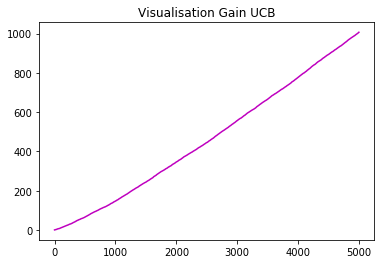

In [23]:
dataset = cliks
politique_UCB = UCB(dataset)

gain_UCB = gain(politique_UCB,dataset)
import matplotlib.pyplot as plt
plt.plot(gain_UCB.cumsum(),color='m')
plt.title("Visualisation Gain UCB")

gain local :  (5000,)
gain max :  (10,)


Text(0.5,1,'Visualisation regret UCB')

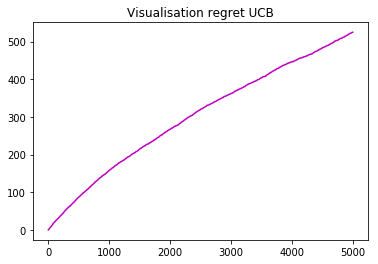

In [33]:
regret_UCB = regret(politique_UCB,dataset)
plt.plot(regret_UCB.cumsum(),color='m')
plt.title("Visualisation regret UCB")

In [10]:
def load(filename):
    f = open(filename, 'r')
    carac_doc = []
    cliks = []
    for line in f.readlines():
        line = line[:-2].split(':')
        carac_doc.append(line[1].split(';'))
        cliks.append(line[2].split(';'))
    return np.array(carac_doc,float), np.array(cliks,float)

# LIN UCB

In [11]:
def LinUCB(context,dataset,alpha=0.5):
    caract_doc = Context.shape[1]
    actions = np.zeros((Context.shape[0]),int)
    a = np.eye(caract_doc).reshape(1,caract_doc,caract_doc).repeat(dataset.shape[1],axis=0)
    b = np.zeros((dataset.shape[1],caract_doc))
    theta = np.zeros((dataset.shape[1],caract_doc))
    p = np.zeros((dataset.shape[1]))
    for i in range(dataset.shape[0]):
        for j in range(dataset.shape[1]):
             inva = np.linalg.inv(a[j])
             theta[j] = inva.dot(b[j])
             p[j] = theta[j].dot(context[i]) + alpha * np.sqrt(context[i].dot(inva.dot(context[i])))
        actions[i] = np.random.choice(np.where(p==p.max())[0])
        a[actions[i]] += context[i].dot(context[i])
        b[actions[i]] += dataset[i][actions[i]]*context[i]
    return actions

In [12]:
carac_doc,cliks = load("CTR.txt")

In [13]:
Context = carac_doc
dataset = cliks
politique_LinUCB = LinUCB(Context,dataset,alpha=0.5)

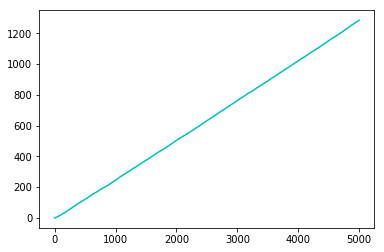

In [39]:
Context = carac_doc
dataset = cliks
politique_LinUCB = LinUCB(Context,dataset,alpha=0.5)
gain_LinUCB = gain(politique_LinUCB,dataset)
plt.plot(gain_LinUCB.cumsum(),color='c')

Text(0.5,1,'Visualisation regret UCB')

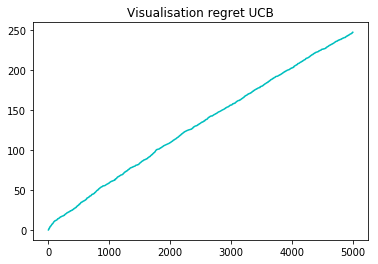

In [40]:
regret_LinUCB = regret(politique_LinUCB,dataset)
plt.plot(regret_LinUCB.cumsum(),color='c')
plt.title("Visualisation regret UCB")

# Optimisation de la valeur de $\alpha$ pour LinUCB

On sait que $\alpha$ appartient à $\mathbb{R⁺}$, mais nous allons chrcher à l'ajuster tel que le gain soin maximal et le regret minimal.

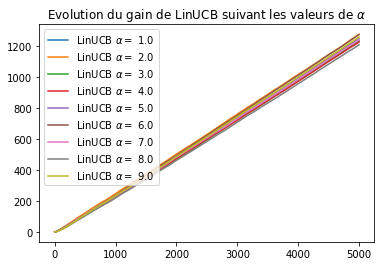

In [88]:
gain_max = []
for alpha in np.arange(1,10):
    politique_LinUCB = LinUCB(Context,dataset,alpha=alpha)
    gain_LinUCB = gain(politique_LinUCB,dataset)
    plt.plot(gain_LinUCB.cumsum(),label=r'LinUCB $\alpha = $ %.1f'%alpha)
    gain_max.append(gain_LinUCB.cumsum()[-1])
plt.legend()
plt.title(r"Evolution du gain de LinUCB suivant les valeurs de $\alpha$")
plt.show()

On voit que le résultat n'est pas transcendant, on décide donc de choisir la valeur de $\alpha$ entre $0.1$ et $1$ et d'analyser la valeur du gain et du regret.

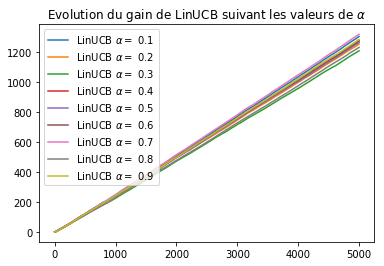

In [77]:
gain_max = []
for alpha in np.arange(0.1,1,0.1):
    politique_LinUCB = LinUCB(Context,dataset,alpha=alpha)
    gain_LinUCB = gain(politique_LinUCB,dataset)
    plt.plot(gain_LinUCB.cumsum(),label=r'LinUCB $\alpha = $ %.1f'%alpha)
    gain_max.append(gain_LinUCB.cumsum()[-1])
plt.legend()
plt.title(r"Evolution du gain de LinUCB suivant les valeurs de $\alpha$")
plt.show()

In [85]:
ind_alph = np.array(gain_max).argmax()
alpha = np.arange(0.1,1,0.1)
print r'La politique maximisant le gain est celle associée au alpha = %.1f'%alpha[ind_alph]

La politique maximisant le gain est celle associée au alpha = 0.7


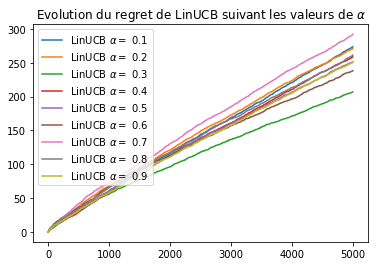

In [82]:
regret_min = []
for alpha in np.arange(0.1,1,0.1):
    politique_LinUCB = LinUCB(Context,dataset,alpha=alpha)
    regret_LinUCB = regret(politique_LinUCB,dataset)
    plt.plot(regret_LinUCB.cumsum(),label=r'LinUCB $\alpha = $ %.1f'%alpha)
    regret_min.append(regret_LinUCB.cumsum()[-1])
plt.legend()
plt.title(r"Evolution du regret de LinUCB suivant les valeurs de $\alpha$")
plt.show()

In [84]:
ind_alph = np.array(gain_max).argmin()
alpha = np.arange(0.1,1,0.1)
print r'La politique minimisant le regret est celle associée au alpha = %.1f'%alpha[ind_alph]

La politique minimisant le regret est celle associée au alpha = 0.3


On note que la valeur de $\alpha$ minimisant le regret et celle maximisant le gain n'est pas la même. Valant respectivement $\alpha=0.3$ et $\alpha=0.7$. On pour en moyenner les performance sur les deux mesures on choisi donc $\alpha=0.5$. 

# Comparaisons et Analyses entre les différentes méthodes :

On affiche le reward et le regret pour chaque méthode afin de les comparer.

<Figure size 432x288 with 0 Axes>

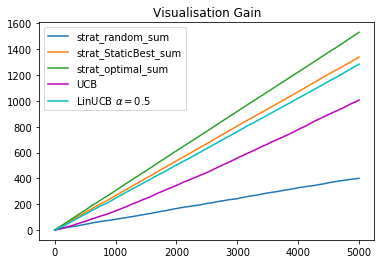

In [50]:
politique_UCB = UCB(dataset)
politique_LinUCB = LinUCB(Context,dataset,alpha=0.5)

data['strat_random_sum']=data.apply(lambda x : x[x['strat_random']],axis=1)
data['strat_StaticBest_sum']=data.apply(lambda x : x[x['strat_StaticBest']],axis=1)
data['strat_optimal_sum']=data.apply(lambda x : x[x['strat_optimal']],axis=1)
plt.figure()
data[['strat_random_sum','strat_StaticBest_sum','strat_optimal_sum']].cumsum().plot()
plt.plot(gain_UCB.cumsum(),color='m',label="UCB")
plt.plot(gain_LinUCB.cumsum(),color='c',label=r"LinUCB $\alpha = 0.5$")
plt.legend()
plt.title("Visualisation Gain")
plt.show()

In [93]:
dataset = cliks
#gain
data['strat_random_sum']=data.apply(lambda x : x[x['strat_random']],axis=1)
#regret
regret_random = dataset.max(1)-data['strat_random_sum']



array([0.        , 0.32459556, 0.11890555, ..., 0.35751993, 0.17043651,
       0.36990121])

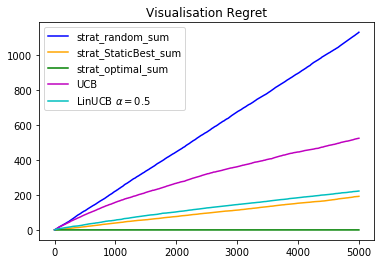

In [96]:
politique_UCB = UCB(dataset)
regret_UCB = regret(politique_UCB,dataset)
politique_LinUCB = LinUCB(Context,dataset,alpha=0.5)
regret_LinUCB = regret(politique_LinUCB,dataset)

data['strat_random_sum']=data.apply(lambda x : x[x['strat_random']],axis=1)
data['strat_StaticBest_sum']=data.apply(lambda x : x[x['strat_StaticBest']],axis=1)
data['strat_optimal_sum']=data.apply(lambda x : x[x['strat_optimal']],axis=1)

regret_random = dataset.max(1)-data['strat_random_sum']
regret_StaticBest = dataset.max(1)-data['strat_StaticBest_sum']
regret_optimal = dataset.max(1)-data['strat_optimal_sum']

plt.figure()
plt.plot(regret_random.cumsum(), color='b',label="strat_random_sum")
plt.plot(regret_StaticBest.cumsum(), color='orange', label="strat_StaticBest_sum")
plt.plot(regret_optimal.cumsum(), color='g',label="strat_optimal_sum")
plt.plot(regret_UCB.cumsum(),color='m',label="UCB")
plt.plot(regret_LinUCB.cumsum(),color='c',label=r"LinUCB $\alpha = 0.5$")
plt.legend()
plt.title("Visualisation Regret")
plt.show()

On note que LinUCB et la méthode StaticBest sont assez concurrentes quand à la minimisation du Regret. De même pour la maximisation du Gain, on a que ces deux méthodes sont concurrentes. Toutefois d'un point de vue connaissance et apprentissage c'est linUCB qui donne les meilleurs performance. En effet cette méthode apprend au fur et à mesure et ajuste ces déscisions en fonction de sa connaissance. Elle donnera de bonnes performances peut importante la base qu'elle doit apprendre.